In [28]:
import os
import pandas as pd
import seaborn as sns
import mysql.connector
from sqlalchemy import create_engine
from sqlalchemy import (Column, DateTime, Integer, Numeric, Float, String, Text)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import gmean
from scipy import stats

In [2]:
np.__version__

'1.12.1'

In [3]:
immport_user = os.getenv("IMMPORT_USER","USER")
immport_password = os.getenv("IMMPORT_PASSWORD","PASSWORD")
immport_database = os.getenv("IMMPORT_DATABASE","DR26")
immport_host = os.getenv("IMMPORT_HOST","127.0.0.1")

In [4]:
conn1 = f"mysql+mysqlconnector://{immport_user}:{immport_password}@{immport_host}:3306/{immport_database}"
immportConn = create_engine(conn1, connect_args={'connect_timeout': 120 }, echo=False)


In [5]:
sql = f'''
SELECT va.subject_accession, va.study_accession, va.study_time_collected,  va.value_preferred, va.virus_strain_preferred
FROM vaccine_analysis va
ORDER BY va.subject_accession, va.study_accession, va.virus_strain_preferred, va.study_time_collected
'''

hai_result = pd.read_sql(sql, immportConn)


# print(hai_result['virus_strain_preferred'], hai_result['subject_accession'])


In [6]:
def outliers(data):
    (q30,q50,q70) = np.percentile(data, [30, 50, 70])
    iqr = q70 - q30
    mild_upper = (iqr * 1.5) + q70
    mild_lower = q25 - (iqr * 1.5)
    extreme_upper = (iqr * 3.0) + q70
    extreme_lower = q30 - (iqr * 3.0) 
    return {
        "mild_lower": mild_lower,
        "mild_upper": mild_upper,
        "extreme_lower": extreme_lower,
        "extreme_upper": extreme_upper
    }


In [7]:
hai_result['study_accession'].unique()

array(['SDY269', 'SDY61', 'SDY112', 'SDY311', 'SDY312', 'SDY315', 'SDY478',
       'SDY113', 'SDY305', 'SDY472', 'SDY198', 'SDY200', 'SDY196',
       'SDY197', 'SDY199', 'SDY201', 'SDY296', 'SDY301', 'SDY212',
       'SDY314', 'SDY369', 'SDY372', 'SDY376', 'SDY645', 'SDY406', 'SDY515'], dtype=object)

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
//     return true;

}

<IPython.core.display.Javascript object>

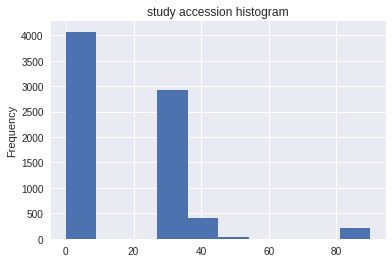

In [9]:
studies = sorted(hai_result['study_accession'].unique())
plt.figure();
hai_result['study_time_collected'].plot.hist(title='study accession histogram', rot = 0)
plt.show();
plt.close()

In [10]:
print((sorted(hai_result['study_accession'].unique())) )
print(len(sorted(hai_result['subject_accession'].unique())) )
print(len(sorted(hai_result['study_time_collected'].unique())) )

['SDY112', 'SDY113', 'SDY196', 'SDY197', 'SDY198', 'SDY199', 'SDY200', 'SDY201', 'SDY212', 'SDY269', 'SDY296', 'SDY301', 'SDY305', 'SDY311', 'SDY312', 'SDY314', 'SDY315', 'SDY369', 'SDY372', 'SDY376', 'SDY406', 'SDY472', 'SDY478', 'SDY515', 'SDY61', 'SDY645']
299
27


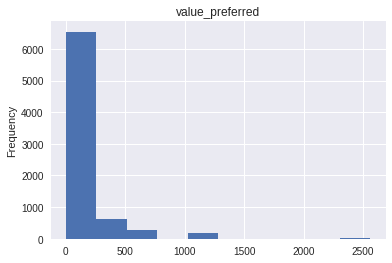

In [11]:
studies = sorted(hai_result['study_accession'].unique())

plt.figure();
histo = hai_result['value_preferred'].plot.hist(title='value_preferred')
plt.show();
plt.close()

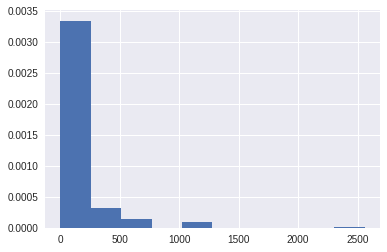

In [12]:
plt.hist(hai_result['value_preferred'], normed = True)
plt.show()
plt.close()


In [13]:
%%time
studies = sorted(hai_result['study_accession'].unique())
day0 = pd.DataFrame(index=hai_result.index, columns=hai_result.columns)
for study in studies:
#     print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    subjects = sorted(df['subject_accession'].unique())
    for subject in subjects:
        
        sub_data = df[df['subject_accession']==subject]
        strains = sorted(sub_data['virus_strain_preferred'].unique().astype(str))
#         print('\t\t----------', subject, '----------')
        for strain in strains:
            if strain != 'None':
                data = sub_data[sub_data['virus_strain_preferred']==strain]
                hold = data[data['study_time_collected']==0]
                
                # print(day0)


CPU times: user 14.9 s, sys: 56 ms, total: 14.9 s
Wall time: 14.9 s


In [14]:
day0 = hai_result.loc[hai_result['virus_strain_preferred'] == 0]

In [15]:
strains

['A/California/7/2009',
 'A/Victoria/361/2011',
 'B/Brisbane/60/2008',
 'B/Massachusetts/02/2012']

In [16]:
ran_study = hai_result.sample(frac=0.05)
import random


In [17]:
studies = sorted(hai_result['study_accession'].unique())
#sample 30% of the studies
samples = int( float(len(studies)) * 0.3 )
studies = np.random.choice(studies, samples)
strains = sorted(hai_result['virus_strain_preferred'].unique().astype(str))

studies

array(['SDY269', 'SDY312', 'SDY315', 'SDY515', 'SDY199', 'SDY311', 'SDY301'], 
      dtype='<U6')

In [30]:
%%time

for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    temp = df.copy()
    for strain in strains:
        
        data = df[df['virus_strain_preferred']==strain]
        data = data[data['value_preferred'](np.abs(stats.zscore(df)) < 3).all(axis=1)]
        if data.empty:
            continue
        

#         print('num of bins: ', len(bins) )
#         print('n: ', n)
        #print whole htings
        plt.figure(figsize=(15,5));
        plt.hist(data['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins='auto')
        print('--------------------------', strain, ' whole time course--------------------------')
        plt.show();
        plt.close()
        
        #print the binning
        plt.figure(figsize=(15,5));
        plt.hist(data['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins=2)
        print('--------------------------', strain, ' binning--------------------------')
        plt.show();
        plt.close()
        print(bins)
        
        #seperate data based on bins 
        day0 = data[data['study_time_collected'] == 0]
        n, bins, patches = plt.hist(day0['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins=2)
        plt.close()
        lower_bin = df[df['value_preferred'] < bins[1]]
        upper_bin = df[df['value_preferred'] >= bins[1]]
    
        all_bins = [lower_bin, upper_bin]
        for bin_oi in all_bins:
            #apply the adjustment of ([titer]- median[data]) / standard_deviation[data] )
            std_data = bin_oi['value_preferred'].std()
            med_data = bin_oi['value_preferred'].median()

            temp['adj_mfc'] = bin_oi['value_preferred'].sub(med_data).div(std_data)
    #         print('check these out : ', std_day0, med_day0)
            b = temp['adj_mfc'].dropna()
    #         print('and here it is: ', b)
            print('----------------------------bin----------------------------------')
            plt.figure(figsize=(15,5));

            plt.hist(b, orientation='vertical', edgecolor='black', linewidth=1.2, bins='auto')
            plt.show();
            plt.close()
        print('##############################################################################\n')
        
        
#         print('values: ', day0['value_preferred'])


		=========== SDY269 ===========


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
%%time

for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    temp = df.copy()
    for strain in strains:
        
        data = df[df['virus_strain_preferred']==strain]
        if data.empty:
            continue
        day0 = data[data['study_time_collected'] == 0]
        plt.figure(figsize=(15,5));
#         plt.xticks(np.arange(0, max(hai_result['value_preferred']), step=10) )

        (q30,q50,q70) = np.percentile(data['value_preferred'], [30, 50, 70])

        #print day 0
        n, bins, patches = plt.hist(day0['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins=2)
        print('--------------------------', strain, ' at day 0--------------------------')
        plt.show();
        plt.close()
        print('bins: ', bins)
        print('n: ', n)
    ############################
        
        #apply the adjustment of ([titer]- median[day0]) / standard_deviation[day0] )
        std_day0 = day0['value_preferred'].std()
        med_day0 = day0['value_preferred'].median()
        
        temp['adj_mfc'] = day0['value_preferred'].sub(med_day0).div(std_day0)
        print('check these out : ', std_day0, med_day0)
        a = temp['adj_mfc'].dropna()
#         print('and here it is: ', a)
        print('----------------------------real stuff----------------------------------')
        plt.figure(figsize=(15,5));

        n, bins, patches = plt.hist(a, orientation='vertical', edgecolor='black', linewidth=1.2, bins='auto')
        plt.show();
        plt.close()
    ############################
        #print whole time study
        plt.figure(figsize=(15,5));
        n, bins, patches = plt.hist(data['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins=2)
        print('--------------------------', strain, ' whole time course--------------------------')
        plt.show();
        plt.close()
#         print('num of bins: ', len(bins) )
#         print('n: ', n)
        

        #seperate data based on bins 
        lower_bin = df[df['value_preferred'] < bins[1]]
        upper_bin = df[df['value_preferred'] >= bins[1]]
    
        all_bins = [lower_bin, upper_bin]
        for bin_oi in all_bins:
            #apply the adjustment of ([titer]- median[data]) / standard_deviation[data] )
            std_data = bin_oi['value_preferred'].std()
            med_data = bin_oi['value_preferred'].median()

            temp['adj_mfc'] = bin_oi['value_preferred'].sub(med_data).div(std_data)
    #         print('check these out : ', std_day0, med_day0)
            b = temp['adj_mfc'].dropna()
    #         print('and here it is: ', b)
            print('----------------------------real stuff----------------------------------')
            plt.figure(figsize=(15,5));

            n, bins, patches = plt.hist(b, orientation='vertical', edgecolor='black', linewidth=1.2, bins='auto')
            plt.show();
            plt.close()
        print('##############################################################################\n')
        
        
#         print('values: ', day0['value_preferred'])


Graph the bin of each virus strain in every study.

In [ ]:
%%time
#non-test cell.. test cell above
studies = sorted(hai_result['study_accession'].unique())
strains = sorted(hai_result['virus_strain_preferred'].unique().astype(str))

for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    for strain in strains:
        data = df[df['virus_strain_preferred']==strain]
        if data.empty:
            continue
        day0 = data[data['study_time_collected'] == 0]
        plt.figure(figsize=(15,5));
#         plt.xticks(np.arange(0, max(hai_result['value_preferred']), step=10) )

        n, bins, patches = plt.hist(day0['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins=2)
        print('--------------------------', strain, '--------------------------')
        plt.show();
        plt.close()
        print('bins: ', bins)
        print('n: ', n)
#         print('values: ', day0['value_preferred'])


%%time

studies = sorted(hai_result['study_accession'].unique())
for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    subjects = sorted(df['subject_accession'].unique())
    for subject in subjects:
        
        sub_data = df[df['subject_accession']==subject]
        strains = sorted(sub_data['virus_strain_preferred'].unique().astype(str))
        print('\t\t----------', subject, '----------')
        for strain in strains:
            if strain != 'None':
                data = sub_data[sub_data['virus_strain_preferred']==strain]
                data.plot.scatter(x='study_time_collected',y='value_preferred', c= 'DarkBlue', title =strain)
                plt.show();
                plt.close()
        print('--------------------------------------------------------')



%%time
use this one for inspiration
studies = sorted(hai_result['study_accession'].unique())
for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    subjects = sorted(df['subject_accession'].unique())
    for subject in subjects:
        
        sub_data = df[df['subject_accession']==subject]
        strains = sorted(sub_data['virus_strain_preferred'].unique().astype(str))
        print('\t\t----------', subject, '----------')
        for strain in strains:
            if strain != 'None':
                data = sub_data[sub_data['virus_strain_preferred']==strain]
                data.plot.scatter(x='study_time_collected',y='value_preferred', c= 'DarkBlue', title =strain)
                plt.show();
                plt.close()
        print('--------------------------------------------------------')

'''
temp = pd
for i in hai_result:
    iterate thru hai result
    check if the day is 0 
        if so change the list of values
        if not, add the values to the list
    get geometric mean of the list 
    add that to the studies page
    litlit
'''
studies = sorted(hai_result['study_accession'].unique())
means = []

for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    subjects = sorted(df['subject_accession'].unique())
    for subject in subjects:
#         print(subject['study_accession'])
        temp = df[df['subject_accession']]